Exploring precision and recall

In [ ]:
pip install turicreate

In [2]:
from __future__ import division
import turicreate
import numpy as np

Load amazon review dataset

In [3]:
products = turicreate.SFrame('/content/drive/My Drive/amazon_baby.sframe')
products

Finished parsing file /content/drive/My Drive/amazon_baby.csv

Parsing completed. Parsed 100 lines in 3.43348 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 105953 lines. Lines per second: 78846.2

Finished parsing file /content/drive/My Drive/amazon_baby.csv

Parsing completed. Parsed 183531 lines in 1.58649 secs.

Columns:
	name	str
	review	str
	rating	int

Rows: 183531

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|    Planetwise Flannel Wipes   | These flannel wipes are OK... |   3    |
|     Planetwise Wipe Pouch     | it came early and was not ... |   5    |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |   5    |
| Stop Pacifier Sucking with... | This is a product well wor... |   5    |
| Stop Pacifier Sucking with... | All of my kids have cried ... |   5    |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |   5    |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |   4    |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |   5    |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |   5    |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |   4    |
+-------------------------------+-------------------------------+--------+
[183531 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

Extract word counts and sentiments

In [4]:
import string

def remove_punctuation(text):
    translator = text.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

# Remove punctuation.
review_clean = products['review'].apply(remove_punctuation)

# Count words
products['word_count'] = turicreate.text_analytics.count_words(review_clean)

# Drop neutral sentiment reviews.
products = products[products['rating'] != 3]

# Positive sentiment to +1 and negative sentiment to -1
products['sentiment'] = products['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [5]:
products

Columns:
	name	str
	review	str
	rating	int
	word_count	dict
	sentiment	int

Rows: 166752

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |   5    |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |   5    |
| Stop Pacifier Sucking with... | This is a product well wor... |   5    |
| Stop Pacifier Sucking with... | All of my kids have cried ... |   5    |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |   5    |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |   4    |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |   5    |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |   5    |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |   4    |
| Baby Tracker&reg; - Daily ... | I love this journal and ou... |   4    |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+
|           word_count          | sentiment |
+-------------------------------+-----------+
| {'recommend': 1.0, 'highly... |     1     |
| {'quilt': 1.0, 'this': 1.0... |     1     |
| {'tool': 1.0, 'clever': 1.... |     1     |
| {'rock': 1.0, 'headachesth... |     1     |
| {'thumb': 1.0, 'or': 1.0, ... |     1     |
| {'2995': 1.0, 'for': 1.0, ... |     1     |
| {'right': 1.0, 'because': ... |     1     |
| {'like': 1.0, 'and': 1.0, ... |     1     |
| {'in': 1.0, 'pages': 1.0, ... |     1     |
| {'tracker': 1.0, 'now': 1.... |     1     |
+-------------------------------+-----------+
[166752 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.



Split data into training and test sets

In [ ]:
train_data, test_data = products.random_split(.8, seed=1)

Train a logistic regression classifier

In [ ]:
model = turicreate.logistic_classifier.create(train_data, target='sentiment',
                                              features=['word_count'],
                                              validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133416

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 121712

Number of coefficients      : 121713

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 0         | 4        | 0.250000  | 1.409712     | 0.840754          |

| 1         | 9        | 3.250000  | 3.351635     | 0.941514          |

| 2         | 11       | 2.778177  | 4.268765     | 0.942638          |

| 3         | 12       | 2.778177  | 4.862840     | 0.967822          |

| 4         | 13       | 2.778177  | 5.432725     | 0.976495          |

| 5         | 14       | 2.778177  | 6.006952     | 0.976495          |

+-----------+----------+-----------+--------------+-------------------+



Model Evaluation

We will explore the advanced model evaluation concepts that were discussed in the lectures.

Accuracy
One performance metric we will use for our more advanced exploration is accuracy, which we have seen many times in past assignments. Recall that the accuracy is given by

accuracy = correctly classified data points/total data points
 
To obtain the accuracy of our trained models using Turi Create, simply pass the option metric='accuracy' to the evaluate function. We compute the accuracy of our logistic regression model on the test_data as follows:

In [ ]:
accuracy= model.evaluate(test_data, metric='accuracy')['accuracy']
print("Test Accuracy: %s" % accuracy)

Test Accuracy: 0.9221862251019919


Baseline: Majority class prediction

In [ ]:
baseline = len(test_data[test_data['sentiment'] == 1])/len(test_data)
print("Baseline accuracy (majority class classifier): %s" % baseline)

Baseline accuracy (majority class classifier): 0.8427825773938085


confusion_matrix 

In [ ]:
confusion_matrix = model.evaluate(test_data, metric='confusion_matrix')['confusion_matrix']
confusion_matrix

Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        -1       |  896  |
|      -1      |        -1       |  3543 |
|      -1      |        1        |  1698 |
|      1       |        1        | 27199 |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Computing the cost of mistakes

In [ ]:
cost = 100*1698 + 1*896
cost

170696

Precision and Recall

In [ ]:
precision = model.evaluate(test_data,metric ='precision')
precision

{'precision': 0.941239575042392}

In [ ]:
prediction = model.predict(test_data)

In [ ]:
1698/33336

0.05093592512598992

In [ ]:
recall = model.evaluate(test_data, metric='recall')['recall']
print("Recall on test data: %s" % recall)

Recall on test data: 0.9681082043068162


Precision-recall tradeoff

Varying the threshold
False positives are costly in our example, so we may want to be more conservative about making positive predictions. To achieve this, instead of thresholding class probabilities at 0.5, we can choose a higher threshold.

Write a function called apply_threshold that accepts two things

probabilities (an SArray of probability values)
threshold (a float between 0 and 1).
The function should return an SArray, where each element is set to +1 or -1 depending whether the corresponding probability exceeds threshold.

In [ ]:
def apply_threshold(probabilities, threshold):
    ans = turicreate.SArray([+1 if x >= threshold else -1 for x in probabilities])
    return ans

In [ ]:
probabilities = model.predict(test_data, output_type='probability')
predictions_with_default_threshold = apply_threshold(probabilities, 0.5)
predictions_with_high_threshold = apply_threshold(probabilities, 0.9)

In [ ]:
print("Number of positive predicted reviews (threshold = 0.5): %s" % (predictions_with_default_threshold == 1).sum())

Number of positive predicted reviews (threshold = 0.5): 28897


In [ ]:
print("Number of positive predicted reviews (threshold = 0.9): %s" % (predictions_with_high_threshold == 1).sum())

Number of positive predicted reviews (threshold = 0.9): 25031


Exploring the associated precision and recall as the threshold varies

In [ ]:
# Threshold = 0.5
precision_with_default_threshold = turicreate.evaluation.precision(test_data['sentiment'],
                                        predictions_with_default_threshold)

recall_with_default_threshold = turicreate.evaluation.recall(test_data['sentiment'],
                                        predictions_with_default_threshold)

# Threshold = 0.9
precision_with_high_threshold = turicreate.evaluation.precision(test_data['sentiment'],
                                        predictions_with_high_threshold)
recall_with_high_threshold = turicreate.evaluation.recall(test_data['sentiment'],
                                        predictions_with_high_threshold)


In [ ]:
print("Precision (threshold = 0.5): %s" % precision_with_default_threshold)
print("Recall (threshold = 0.5)   : %s" % recall_with_default_threshold)

Precision (threshold = 0.5): 0.941239575042392
Recall (threshold = 0.5)   : 0.9681082043068162


In [ ]:
print("Precision (threshold = 0.9): %s" % precision_with_high_threshold)
print("Recall (threshold = 0.9)   : %s" % recall_with_high_threshold)

Precision (threshold = 0.9): 0.9728736366905038
Recall (threshold = 0.9)   : 0.8667734472326036


Precision-recall curve

In [ ]:
threshold_values = np.linspace(0.5, 1, num=100)
print(threshold_values)

[0.5        0.50505051 0.51010101 0.51515152 0.52020202 0.52525253
 0.53030303 0.53535354 0.54040404 0.54545455 0.55050505 0.55555556
 0.56060606 0.56565657 0.57070707 0.57575758 0.58080808 0.58585859
 0.59090909 0.5959596  0.6010101  0.60606061 0.61111111 0.61616162
 0.62121212 0.62626263 0.63131313 0.63636364 0.64141414 0.64646465
 0.65151515 0.65656566 0.66161616 0.66666667 0.67171717 0.67676768
 0.68181818 0.68686869 0.69191919 0.6969697  0.7020202  0.70707071
 0.71212121 0.71717172 0.72222222 0.72727273 0.73232323 0.73737374
 0.74242424 0.74747475 0.75252525 0.75757576 0.76262626 0.76767677
 0.77272727 0.77777778 0.78282828 0.78787879 0.79292929 0.7979798
 0.8030303  0.80808081 0.81313131 0.81818182 0.82323232 0.82828283
 0.83333333 0.83838384 0.84343434 0.84848485 0.85353535 0.85858586
 0.86363636 0.86868687 0.87373737 0.87878788 0.88383838 0.88888889
 0.89393939 0.8989899  0.9040404  0.90909091 0.91414141 0.91919192
 0.92424242 0.92929293 0.93434343 0.93939394 0.94444444 0.94949

In [ ]:
precision_all = []
recall_all = []

probabilities = model.predict(test_data, output_type='probability')
for threshold in threshold_values:
    predictions = apply_threshold(probabilities, threshold)
    
    precision = turicreate.evaluation.precision(test_data['sentiment'], predictions)
    recall = turicreate.evaluation.recall(test_data['sentiment'], predictions)
    
    precision_all.append(precision)
    recall_all.append(recall)

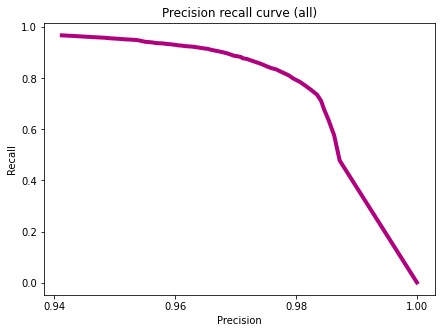

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')


In [ ]:
threshold_values[np.array(precision_all) >= 0.965].min()

0.8131313131313131

In [ ]:
probabilities_2 = model.predict(test_data, output_type='probability')
prediction_2 = apply_threshold(probabilities_2, 0.98)
value_2 = turicreate.evaluation.confusion_matrix(test_data['sentiment'],prediction_2)
value_2


Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        -1       |  9056 |
|      1       |        1        | 19039 |
|      -1      |        -1       |  4943 |
|      -1      |        1        |  298  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Evaluating specific search terms

Precision-Recall on all baby related items

In [ ]:
baby_reviews =  test_data[test_data['name'].apply(lambda x: 'baby' in x.lower())]
baby_reviews

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int

Rows: Unknown

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
| Baby Tracker&reg; - Daily ... | I love this journal and ou... |  4.0   |
| Baby's First Year Undated ... | I searched high and low fo... |  5.0   |
|   Our Baby Girl Memory Book   | Absolutely love it and all... |  5.0   |
| Newborn Baby Tracker&reg; ... | This is the best way to ke... |  5.0   |
| Large Jungle Animals (Pand... | I ordered these for my 7 m... |  5.0   |
| Sassy Who Loves Baby? Phot... | I bought this for a new gr... |  5.0   |
| Sassy Who Loves Baby? Phot... | I originally bought this f... |  5.0   |
| Crown Crafts The Original ... | This is a great product bu... |  1.0   |
| Crown Crafts The Original ... | I used this sling for both... |  5.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+
|           word_count          | sentiment |
+-------------------------------+-----------+
| {'in': 1.0, 'pages': 1.0, ... |     1     |
| {'tracker': 1.0, 'now': 1.... |     1     |
| {'pictures': 1.0, 'persona... |     1     |
| {'again': 1.0, 'book': 1.0... |     1     |
| {'gift': 1.0, 'and': 1.0, ... |     1     |
| {'really': 1.0, 'look': 1.... |     1     |
| {'little': 1.0, 'photo': 1... |     1     |
| {'just': 1.0, 'hell': 1.0,... |     1     |
| {'of': 1.0, 'got': 1.0, 'a... |     -1    |
| {'pack': 1.0, 'dont': 1.0,... |     1     |
+-------------------------------+-----------+
[? rows x 5 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [ ]:
probabilities_baby = model.predict(baby_reviews, output_type='probability')

In [ ]:
threshold_values_baby = np.linspace(0.5, 1, num=100)

In [ ]:
precision_all_baby = []
recall_all_baby = []

for threshold in threshold_values_baby:
    
    # Make predictions. Use the `apply_threshold` function 
    predictions = apply_threshold(probabilities_baby,threshold)

    # Calculate the precision.
    
    precision = turicreate.evaluation.precision(baby_reviews['sentiment'],predictions)
    
    # YOUR CODE HERE
    recall =  turicreate.evaluation.recall(baby_reviews['sentiment'],predictions)
    
    # Append the precision and recall scores.
    precision_all_baby.append(precision)
    recall_all_baby.append(recall)

In [ ]:
threshold_values[np.array(precision_all_baby) >= 0.965].min()

0.8484848484848485

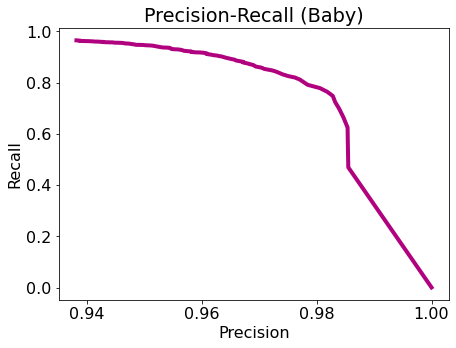

In [ ]:
plot_pr_curve(precision_all_baby, recall_all_baby, "Precision-Recall (Baby)")